## Revision Estructural y Limpieza de datos

In [1]:
import pandas as pd

f_steamgame = 'data//Steam-Games.csv'
df = pd.read_csv(f_steamgame)
df.head(2)

/tmp/ipykernel_79577/339772375.py:7: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f_steamgame)


,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


En la primera exploración vemos que existen registros nulos, antes de seguir con la exploracion visualizare la cantidad de ellos para poderlos eliminar

In [2]:
import matplotlib.pyplot as plt
import missingno

# Funcion que grafica los nulos de un df
def plot_nulls(df):
    # Obtener la cantidad de valores nulos por columna
    valores_nulos = df.isna().sum()

    # Filtrar las columnas con valores nulos
    columnas_con_nulos = valores_nulos[valores_nulos > 0].index

    # Generar una lista de colores basada en la cantidad de columnas con nulos
    colores = plt.cm.tab20(range(len(columnas_con_nulos)))

    #Imprime las barras de los nulos
    missingno.bar(df[columnas_con_nulos], fontsize=8, color=colores, figsize=(10, 3))
    plt.title("Valores Nulos", fontsize=20)

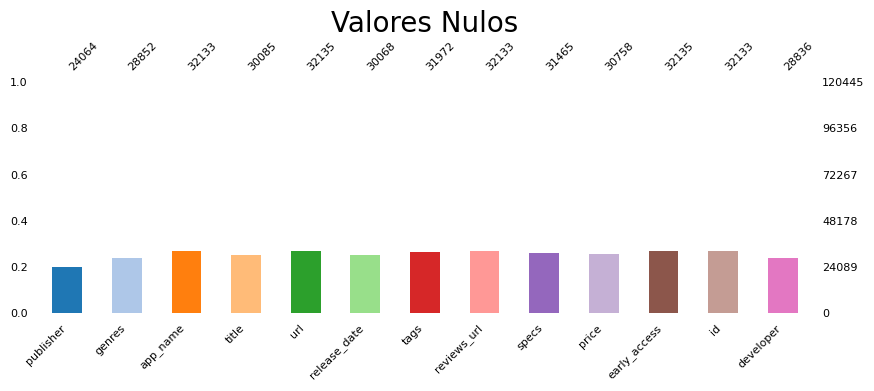

In [3]:
# Verificar los valores NaN en cada columna
valores_nan = df.isna()  # También puedes usar df.isnull()

# Contar la cantidad de NaN en cada columna
# Lo convierto en df
cantidad_nan_por_columna = pd.DataFrame({'Valores':valores_nan.sum()})
#Transpongo el df solo para mejor visualizacion
cantidad_nan_por_columna.T

# Grafico los nulos
plot_nulls(df)

Como podemos apreciar existen muchisimos registros nulos, se eliminan

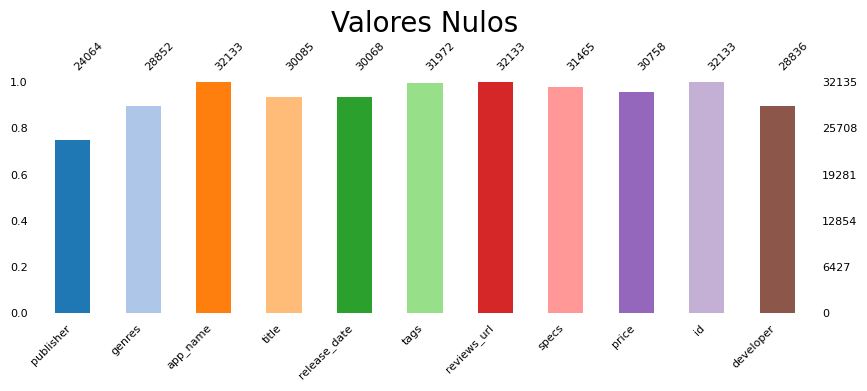

In [4]:
#Elimino los nulos 
df.dropna(how='all', inplace=True)

plot_nulls(df)

Voy a guardar el archivo para poderlo explorar visualmente, pero antes voy a acomodar las columnas id, title y app_name como las primeras

In [5]:
mascara = ['id','app_name','title','publisher','genres','url','release_date','tags','reviews_url','specs','price','early_access','developer']
# Reorganizar las columnas según la máscara
df = df.reindex(columns=mascara)
display(df.head(2))

# Guardo el df
df.to_csv('data//Steam-Games(NotNaNs).csv', index=False) 

Aun así hay campos con nulos en cada variable, pero exploraremos las columnas antes

In [7]:
#Imprimo los nombres de las columnas y el numero de variables
columnas = list(df.columns)
print(columnas)
numVar = len(columnas)
print("Numero de Variables: ",numVar)

['id', 'app_name', 'title', 'publisher', 'genres', 'url', 'release_date', 'tags', 'reviews_url', 'specs', 'price', 'early_access', 'developer']
Numero de Variables:  13


Segun el diccionario de datos tenemos:

- **publisher:** Empresa publicadora del juego
- **genres :** Genero del juego
- **app_name :** Nombre del juego
- **title :** Titulo del juego
- **url :** URL de publicación del juego
- **release_date :** Fecha de lanzamiento
- **tags :** etiquetas de juego 
- **reviews_url :** Reviews de juego
- **specs :** Especificaciones
- **price :** Precio del juego
- **early_access :** acceso temprano
- **id :** Identificador del juego
- **developer :** Desarrollador

Encuentro que el id, el app_name y title deberian de ser unicos y ser correspondidos los 3, verifiquemos

In [8]:
# Contar los valores NaN en id,title y app_name 
num_NaNs_id = df['id'].isna().sum()
num_NaNs_title = df['title'].isna().sum()
num_NaNs_appName = df['app_name'].isna().sum()

# Mostrar el número de valores NaN
print(f'Número de NaN en id: {num_NaNs_id}')
print(f'Número de NaN en Nombre: {num_NaNs_appName}')
print(f'Número de NaN en titulo: {num_NaNs_title}')


Número de NaN en id: 2
Número de NaN en Nombre: 2
Número de NaN en titulo: 2050


Como podemos observar aparenta que hay una cantidad de registros en la que se encuentra vacio el titulo, Voy a verificar los nulos: en donde los registros tienen nulos en las 3 columnas y los registros que tienen nulos en al menos 2 columnas

In [9]:
# Cuenta el número de NaN en cada columna
nan_counts = df[['id', 'app_name', 'title']].isna().sum(axis=1)

# Registros con al menos dos NaN
at_least_two_nans = (nan_counts >= 2).sum()

# Registros con tres NaN
all_three_nans = (nan_counts == 3).sum()

# Mostrar los resultados
print(f'Registros con al menos dos NaN en las tres columnas: {at_least_two_nans}')
print(f'Registros con tres NaN en las tres columnas: {all_three_nans}')

Registros con al menos dos NaN en las tres columnas: 2
Registros con tres NaN en las tres columnas: 1


Encontramos que existen registros que no tienen ni id, ni title  y tampoco Nombre. Por lo pronto elimino todos estos registros

In [10]:
# Eliminar registros con tres NaN en las tres columnas
df = df.dropna(subset=['id', 'app_name', 'title'], how='all')

# Vuelvo a presentar los datos
# Cuenta el número de NaN en cada columna
nan_counts = df[['id', 'app_name', 'title']].isna().sum(axis=1)

# Registros con al menos dos NaN
at_least_two_nans = (nan_counts >= 2).sum()

# Registros con tres NaN
all_three_nans = (nan_counts == 3).sum()

# Mostrar los resultados
print(f'Registros con al menos dos NaN en las tres columnas: {at_least_two_nans}')
print(f'Registros con tres NaN en las tres columnas: {all_three_nans}')

Registros con al menos dos NaN en las tres columnas: 1
Registros con tres NaN en las tres columnas: 0


Como es solo un registro que no tiene nombre, titulo o id , podemos rellenarlo

In [11]:
# Crear una máscara para registros que tienen al menos 2 NaN en las tres columnas
mask = df[['id', 'app_name', 'title']].isna().sum(axis=1) >= 2

# Crear un DataFrame con los registros que cumplen con la condición
result_df = df[mask].copy()

# Agregar una columna con la posición del registro en el DataFrame original
result_df['original_row_index'] = result_df.index.values

# Restablecer los índices del DataFrame resultante
result_df.reset_index(drop=True, inplace=True)

# Mostrar el DataFrame resultante
result_df[['id','title','app_name']]


,id,title,app_name
0,317160.0,NaN,NaN


Como tiene id, Voy a buscar el titulo o nombre en el archivo de items y poder rellenarlo, este paso lo haré mas adelante, por que solo es un registro

### Duplicados 
Analizo id y elimino los registros duplicados

In [12]:
# Contar el total de registros
total_registros = df.shape[0]

# Contar el total de registros duplicados en la columna "id"
duplicados = df[df.duplicated(subset='id', keep=False)].shape[0]

# Mostrar los resultados
print(f'Total de registros: {total_registros}')
print(f'Total de registros duplicados en la columna "id": {duplicados}')

duplicados_df = df[df.duplicated(subset='id', keep=False)]
display(duplicados_df[['id','app_name','title']].head())

# Eliminar los duplicados y conservar solo el valor original en la columna "id"
df = df.drop_duplicates(subset='id', keep='first')

Total de registros: 32134
Total de registros duplicados en la columna "id": 2


,id,app_name,title
102204,612880.0,Wolfenstein II: The New Colossus,Wolfenstein II: The New Colossus
102883,612880.0,Wolfenstein II: The New Colossus,Wolfenstein II: The New Colossus


Ahora debo de analizar por title y por app_name

In [15]:
# Contar el total de registros duplicados en la columna "id"
duplicados_title = df[df.duplicated(subset='title', keep=False)].shape[0]
duplicados_name = df[df.duplicated(subset='app_name', keep=False)].shape[0]

# Mostrar los resultados
print(f'Total de registros: {total_registros}')
print(f'Total de registros duplicados en la columna "title": {duplicados_title}')
print(f'Total de registros duplicados en la columna "app_name": {duplicados_name}')

#Duplicados de title
duplicados_df = df[df.duplicated(subset='title', keep=False)]
display(duplicados_df[['id','app_name','title']].head())

#Duplicados de app_name
duplicados_df = df[df.duplicated(subset='app_name', keep=False)]
display(duplicados_df[['id','app_name','title']].head())

Total de registros: 32134
Total de registros duplicados en la columna "title": 2108
Total de registros duplicados en la columna "app_name": 75


,id,app_name,title
88314,773570.0,Log Challenge,NaN
88321,724910.0,Icarus Six Sixty Six,NaN
88329,772590.0,After Life VR,NaN
88330,640250.0,Kitty Hawk,NaN
88332,711440.0,Mortars VR,NaN


,id,app_name,title
89378,200260.0,Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition
89818,93304.0,The Dream Machine: Chapter 4,The Dream Machine: Chapter 4
89819,94304.0,The Dream Machine: Chapter 4,The Dream Machine: Chapter 4
89975,251410.0,Dark Matter,Dark Matter
90860,315550.0,Taxi,Taxi


Aquí encuentro que hay muchos NaNs en title, voy a rellenarlos con app_name

In [17]:
# df donde ambas columnas tengan NaNs
both_nan_df = df[df['title'].isna() & df['app_name'].isna()]

# Rellenar NaNs en "title" con valores de "app_name" y viceversa
df['title'].fillna(df['app_name'], inplace=True)
df['app_name'].fillna(df['title'], inplace=True)

# Mostrar el DataFrame con registros donde ambas columnas tienen NaN
display(both_nan_df.head())

# Mostrar el DataFrame resultante
display(df.head(2))

,id,app_name,title,publisher,genres,url,release_date,tags,reviews_url,specs,price,early_access,developer
90890,317160.0,NaN,NaN,NaN,"['Action', 'Indie']",http://store.steampowered.com/app/317160/_/,2014-08-26,"['Action', 'Indie']",http://steamcommunity.com/app/317160/reviews/?...,"['Single-player', 'Game demo']",NaN,False,NaN


,id,app_name,title,publisher,genres,url,release_date,tags,reviews_url,specs,price,early_access,developer
88310,761140.0,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,Kotoshiro
88311,643980.0,Ironbound,Ironbound,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,False,Secret Level SRL


In [20]:
# Contar el total de registros duplicados en la columna "id"
duplicados_title = df[df.duplicated(subset='title', keep=False)].shape[0]
duplicados_name = df[df.duplicated(subset='app_name', keep=False)].shape[0]

# Mostrar los resultados
print(f'Total de registros: {total_registros}')
print(f'Total de registros duplicados en la columna "title": {duplicados_title}')
print(f'Total de registros duplicados en la columna "app_name": {duplicados_name}')

#Duplicados de title
duplicados_title_df = df[df.duplicated(subset='title', keep=False)]
display(duplicados_title_df[['id','app_name','title']].head())

#Duplicados de app_name
duplicados_name_df = df[df.duplicated(subset='app_name', keep=False)]
display(duplicados_name_df[['id','app_name','title']].head())

Total de registros: 32134
Total de registros duplicados en la columna "title": 73
Total de registros duplicados en la columna "app_name": 75


,id,app_name,title
89378,200260.0,Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition
89818,93304.0,The Dream Machine: Chapter 4,The Dream Machine: Chapter 4
89819,94304.0,The Dream Machine: Chapter 4,The Dream Machine: Chapter 4
89975,251410.0,Dark Matter,Dark Matter
90860,315550.0,Taxi,Taxi


,id,app_name,title
89378,200260.0,Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition
89818,93304.0,The Dream Machine: Chapter 4,The Dream Machine: Chapter 4
89819,94304.0,The Dream Machine: Chapter 4,The Dream Machine: Chapter 4
89975,251410.0,Dark Matter,Dark Matter
90860,315550.0,Taxi,Taxi


Voy a guardar los duplicados para analizarlos despues

In [22]:
# Guardo el df
duplicados_name_df.to_csv('data//duplicados_name.csv', index=False) 
duplicados_title_df.to_csv('data//duplicados_title.csv', index=False) 

En el analisis visual de los archivos de duplicados me encontre que tienen diferente id y tambien publisher, voy a asumir que son juegos con el mismo nombre pero diferentes, así que me guiare solo por el id

Por ultimo voy a buscar los registros con id igual a 0 o vacios y los elimino

In [24]:
# máscara para identificar los registros con "id" igual a 0 o vacíos
mask = (df['id'] == 0) | (df['id'].isna()) | (df['id'] == '')

# df con los registros a eliminar
registros_condicion_df = df[mask].copy()
num_registros = registros_condicion_df.shape[0]

# Elimino los registros del df original
df = df.loc[~mask]

# df con valores vacios o 0
print("Registros con valor 0 o vacios:")
print("Total de registros con valor 0 o vacios en id: ",num_registros)
display(registros_condicion_df)

# Mostrar el DataFrame resultante sin los registros con "id" igual a 0 o vacíos
print("DataFrame resultante sin registros eliminados:")
df.head(2)

Registros con valor 0 o vacios:
Total de registros con valor 0 o vacios en id:  0


,id,app_name,title,publisher,genres,url,release_date,tags,reviews_url,specs,price,early_access,developer


DataFrame resultante sin registros eliminados:


,id,app_name,title,publisher,genres,url,release_date,tags,reviews_url,specs,price,early_access,developer
88310,761140.0,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,Kotoshiro
88311,643980.0,Ironbound,Ironbound,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,False,Secret Level SRL


In [14]:
#Verifico el tamaño del df
total = len(df)
print("Tamaño del df:",total)

Tamaño del df: 32132


Verifico que la fecha release_date este correcta

In [15]:
# Convertir la columna 'release_date' a formato de fecha y manejar valores no válidos
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Crear un DataFrame con las filas eliminadas (fechas inválidas)
fechas_invalidas_df = df[df['release_date'].isnull()]

# Eliminar las filas con fechas inválidas del DataFrame original
df = df.dropna(subset=['release_date'])

# Extraer el año de 'release_date' y agregarlo como 'year'
df['year'] = df['release_date'].dt.year

print("Fechas inválidas eliminadas: ", len(fechas_invalidas_df))
#display(fechas_invalidas_df.head(2))

# Muestra las primeras filas del DataFrame original
total = len(df)
print("Numero de registros: ",total)
display(df.head(1))


Fechas inválidas eliminadas:  2351
Numero de registros:  29781


,id,app_name,title,publisher,genres,url,release_date,tags,reviews_url,specs,price,early_access,developer,year
0,761140.0,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,Kotoshiro,2018


Guardo el DF

In [16]:
# Guardo el df
total = df.shape[0]
print("Numero de registros guardados: ",total)

df.to_csv('data//Steam-Games(clean).csv', index=False) 

Numero de registros guardados:  29781


 Según un artículo que encontré el Análisis Exploratorio de Datos (EDA) comprende los siguientes puntos:

1. **Definición de Objetivos**:
   - Comprende los objetivos del análisis y las preguntas clave que deseas responder.

2. **Adquisición de Datos**:
   - Reúne los datos de fuentes relevantes y carga los datos en una estructura de datos adecuada.

3. **Exploración Inicial**:
   - Observa las primeras filas de los datos para entender la estructura.
   - Verifica los tipos de datos y los nombres de las columnas.

4. **Limpieza de Datos**:
   - Aborda valores faltantes, duplicados o errores en los datos.
   - Convierte los tipos de datos si es necesario.

5. **Resumen Estadístico**:
   - Calcula estadísticas descriptivas básicas para variables numéricas.
   - Utiliza gráficos, como histogramas y diagramas de caja, para visualizar distribuciones.

6. **Exploración de Relaciones**:
   - Analiza la relación entre variables, como correlaciones entre pares de variables numéricas.
   - Utiliza gráficos de dispersión para visualizar relaciones.

7. **Visualización de Datos**:
   - Crea visualizaciones efectivas, como gráficos de barras, gráficos de líneas, gráficos de dispersión, etc.
   - Utiliza visualizaciones para identificar patrones, tendencias y anomalías.

8. **Análisis de Variables Categóricas**:
   - Explora la distribución de variables categóricas mediante tablas de frecuencia y gráficos de barras.
   - Identifica categorías más comunes.

9. **Análisis de Series Temporales** (si aplicable):
   - Si tienes datos de series temporales, realiza análisis específicos para identificar tendencias y estacionalidad.

10. **Respuesta a Preguntas Clave**:
    - Utiliza el análisis exploratorio para responder las preguntas clave planteadas en el paso 1.

11. **Comunicación de Resultados**:
    - Documenta tus hallazgos en informes o presentaciones que sean comprensibles para otros interesados.

12. **Iteración y Exploración Adicional**:
    - El EDA es un proceso iterativo. Vuelve a pasos anteriores a medida que obtienes más información y claridad sobre los datos.


Pero como los objetivos son muy claros (Las funciones que pide el proyecto ) y la premura del tiempo, me enfocaré en transformar los datos solo para poder desarrollar las funciones.

# Consultas requeridas
<sub> Debes crear las siguientes funciones para los endpoints que se consumirán en la API, recuerden que deben tener un decorador por cada una (@app.get(‘/’)).<sub/>

```python
# Funcion 1.
def PlayTimeGenre( `genero` : str ):
```
Debe devolver `año` con mas horas jugadas para dicho género.
Ejemplo de retorno: {"Año de lanzamiento con más horas jugadas para Género X" : 2013}

```python
# Funcion 2.
def UserForGenre(`genero` : str ):
```    
Debe devolver el usuario que acumula más horas jugadas para el género dado y una lista de la acumulación de horas jugadas por año.

Ejemplo de retorno: {"Usuario con más horas jugadas para Género X" : us213ndjss09sdf,
			     "Horas jugadas":[{Año: 2013, Horas: 203}, {Año: 2012, Horas: 100}, {Año: 2011, Horas: 23}]}
```python
# Funcion 3.
+ def UsersRecommend( `año` : int):
```
Devuelve el top 3 de juegos MÁS recomendados por usuarios para el año dado. (reviews.recommend = True y comentarios positivos/neutrales)
  
Ejemplo de retorno: [{"Puesto 1" : X}, {"Puesto 2" : Y},{"Puesto 3" : Z}]
```python
# Funcion 4.
def UsersNotRecommend(`año` : int ):
```
Devuelve el top 3 de juegos MENOS recomendados por usuarios para el año dado. (reviews.recommend = False y comentarios negativos)
  
Ejemplo de retorno: [{"Puesto 1" : X}, {"Puesto 2" : Y},{"Puesto 3" : Z}]
```python
# Funcion 5.
def sentiment_analysis(`año` : int ):
```
Según el año de lanzamiento, se devuelve una lista con la cantidad de registros de reseñas de usuarios que se encuentren categorizados con un análisis de sentimiento. 
Ejemplo de retorno: {Negative = 182, Neutral = 120, Positive = 278}


## Catalogo de Generos

In [ ]:
import ast

df_Generos = df_Games[['genres','developer']].copy()
#df = df_generos.copy()

# Convierte las cadenas en listas
df_Generos['genres'] = df_Generos['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Desglosa las listas en registros individuales
df_Generos = df_Generos.explode('genres')
# Reindexa el DataFrame después de la expansión
df_Generos = df_Generos.reset_index(drop=True)
df_Generos = df_Generos.drop(['developer'], axis=1)

display(df_Generos.head(4))